# Projecting four-dimensional `penguins` dataset to 2D with *Self-Organizing Map*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAND = 42

## Dataset

In [ ]:
X_scaled = pd.read_csv("../datasets/penguins/simple/X_scaled.csv", index_col=0, header=0)
y = pd.read_csv("../datasets/penguins/simple/y.csv", index_col=0, header=0)

In [ ]:
# TODO: Do some exploratory data analysis
# ...

## Experiment 1: Use only two features

In [ ]:
selected_columns = X_scaled.columns[:2]
print("Selected features:", selected_columns.tolist())

X_scaled_F12 = X_scaled[selected_columns].copy().values
print("Data shape:", X_scaled_F12.shape)

In [ ]:
from _utilities.som import calc_recommended_grid_size, train_som

# TODO: Fit SOM on the two-dimensional dataset

# 1. Define hyperparams
##	- use `calc_recommended_grid_size` methods to get candidate values for `d1` and `d2`

# 2. Fit SOM
##	- use `train_som` method to obtain an `som` object fitted on the data
##	- observe the quality of the SOM outputted, and experiment with different hyperparameter combinations
##		- Quantization error measures the Mean Residual from best-matching nodes
##		- Topographic error measures the proportion of data points for which the 1st and 2nd best-matching units are not neighbors in the SOM grid

# 3. Extract learned node weights (prototype / representative points) from SOM
## - use `som.get_weights()` and flatten them

print("Recommended node size for SOM:", calc_recommended_grid_size(?))

hyparams = {
    "d1": ?,
    "d2": ?,
    "sigma": 2,
    "learning_rate": .1,
    "use_epochs": True,
    "num_iteration": 30,
    "topology": "rectangular"
}

som = train_som(?, **hyparams, random_seed=RAND, verb=True)
node_weights = som.get_weights()
node_weights_flat = node_weights.reshape(-1, node_weights.shape[2])

Next, visualize the original data points (in the selected feature space) and the learned node positions of the SOM. We expect it will look similar to this:

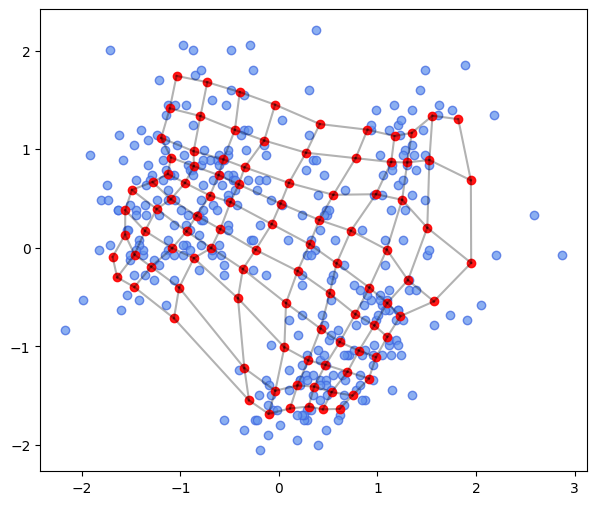

In [ ]:
from _utilities.som import place_node_edges

plt.figure(figsize=(8, 6))
ax = plt.gca()

# data points
plt.scatter(?, ?, color="cornflowerblue", edgecolors="royalblue", alpha=.75)
# node positions
plt.scatter(node_weights_flat[:, 0], node_weights_flat[:, 1], color="red", edgecolors="red", alpha=.9)
place_node_edges(som, ax)

plt.title(?)
ax.set_aspect("equal")
ax.set_xlabel(?)
ax.set_ylabel(?)

plt.show()

In [ ]:
from typing import Literal
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_hitmap(som, X, cmap="binary", title="Hitmap", ax=None):
	if ax is None:
		ax = plt.gca()
	
	ax.set_title(title)

	hitmap = som.activation_response(X).astype(int)

	im = ax.imshow(hitmap, origin="lower", cmap=cmap)
	divider = make_axes_locatable(ax)
	cax = divider.append_axes("right", size="6%", pad=0.2)
	cax.tick_params(labelsize=11)
	cbar = plt.colorbar(im, cax=cax)

def visualize_distance_map(som, X, neighbor_distance_scaling: Literal["sum", "mean"]="mean", cmap="Spectral_r", title="Distance map", ax=None):
	if ax is None:
		ax = plt.gca()
	
	ax.set_title(title)

	distmap = som.distance_map(scaling=neighbor_distance_scaling)

	im = ax.imshow(distmap, origin="lower", cmap=cmap)
	divider = make_axes_locatable(ax)
	cax = divider.append_axes("right", size="6%", pad=0.2)
	cax.tick_params(labelsize=11)
	cbar = plt.colorbar(im, cax=cax)

In [ ]:
visualize_distance_map(?, ?)

In [ ]:
visualize_hitmap(?, ?)